# Odds dataframe

# Remember to change the date of the dataframe!

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import odds

In [2]:
odds_response = requests.get(f'https://api.the-odds-api.com/v4/sports/baseball_mlb/odds', params={
    'api_key': odds.api_key,
    'regions': 'us',
    'markets': 'h2h,spreads',
    'oddsFormat': 'american',
    'dateFormat': 'iso',
})

if odds_response.status_code != 200:
    print(f'Failed to get odds: status_code {odds_response.status_code}, response body {odds_response.text}')

else:
    odds_json = odds_response.json()
    print('Number of events:', len(odds_json))

    # Check the usage quota
    print('Remaining requests', odds_response.headers['x-requests-remaining'])
    print('Used requests', odds_response.headers['x-requests-used'])

Number of events: 15
Remaining requests 468
Used requests 32


In [3]:
def json_to_df(json):
    # This function takes in nested json and outputs a dataframe with the wanted columns
    return pd.json_normalize(json, record_path = ['bookmakers', 'markets', 'outcomes'], meta = ['home_team', 'away_team', ['bookmakers', 'title']])

In [4]:
df = json_to_df(odds_json)

In [5]:
df.head(20)

,name,price,point,home_team,away_team,bookmakers.title
0,Atlanta Braves,-260,NaN,Atlanta Braves,Washington Nationals,FanDuel
1,Washington Nationals,215,NaN,Atlanta Braves,Washington Nationals,FanDuel
2,Atlanta Braves,-134,-1.5,Atlanta Braves,Washington Nationals,FanDuel
3,Washington Nationals,112,1.5,Atlanta Braves,Washington Nationals,FanDuel
4,Atlanta Braves,-278,NaN,Atlanta Braves,Washington Nationals,Circa Sports
5,Washington Nationals,228,NaN,Atlanta Braves,Washington Nationals,Circa Sports
6,Atlanta Braves,-122,-1.5,Atlanta Braves,Washington Nationals,Circa Sports
7,Washington Nationals,104,1.5,Atlanta Braves,Washington Nationals,Circa Sports
8,Atlanta Braves,-260,NaN,Atlanta Braves,Washington Nationals,BetUS
9,Washington Nationals,210,NaN,Atlanta Braves,Washington Nationals,BetUS


In [6]:
df = df[df['point'].isnull()]

In [7]:
df.head()

,name,price,point,home_team,away_team,bookmakers.title
0,Atlanta Braves,-260,NaN,Atlanta Braves,Washington Nationals,FanDuel
1,Washington Nationals,215,NaN,Atlanta Braves,Washington Nationals,FanDuel
4,Atlanta Braves,-278,NaN,Atlanta Braves,Washington Nationals,Circa Sports
5,Washington Nationals,228,NaN,Atlanta Braves,Washington Nationals,Circa Sports
8,Atlanta Braves,-260,NaN,Atlanta Braves,Washington Nationals,BetUS


In [8]:
from datetime import datetime

date = datetime.now().strftime("%Y_%m_%d")

In [9]:
df.to_csv('../data/odds_' + f'{date}' + '.csv', index = False)

In [10]:
max_line = df.loc[df['bookmakers.title'] == 'Bovada']

In [11]:
max_line.drop(columns = 'point', inplace = True)
max_line['name'] = max_line['name'].map({'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL', 'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW', 'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL', 'Detroit Tigers':'DET', 'Miami Marlins':'MIA', 'Houston Astros':'HOU', 'Kansas City Royals':'KCR', 'Los Angeles Angels':'LAA', 'Los Angeles Dodgers':'LAD', 'Milwaukee Brewers':'MIL', 'Minnesota Twins':'MIN', 'New York Mets':'NYM', 'New York Yankees':'NYY', 'Oakland Athletics':'OAK', 'Philadelphia Phillies':'PHI', 'Pittsburgh Pirates':'PIT', 'San Diego Padres':'SDP', 'San Francisco Giants':'SFG', 'Seattle Mariners':'SEA', 'St. Louis Cardinals':'STL', 'Tampa Bay Rays':'TBR', 'Texas Rangers':'TEX', 'Toronto Blue Jays':'TOR', 'Washington Nationals':'WSN'})

C:\Users\rmped\AppData\Local\Temp\ipykernel_12492\1570221920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_line.drop(columns = 'point', inplace = True)
C:\Users\rmped\AppData\Local\Temp\ipykernel_12492\1570221920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_line['name'] = max_line['name'].map({'Arizona Diamondbacks':'ARI', 'Atlanta Braves':'ATL', 'Baltimore Orioles':'BAL', 'Boston Red Sox':'BOS', 'Chicago Cubs':'CHC', 'Chicago White Sox':'CHW', 'Cincinnati Reds':'CIN', 'Cleveland Guardians':'CLE', 'Colorado Rockies':'COL', 'Detroit Tigers':'D

In [12]:
max_line

,name,price,home_team,away_team,bookmakers.title
22,ATL,-260,Atlanta Braves,Washington Nationals,Bovada
23,WSN,210,Atlanta Braves,Washington Nationals,Bovada
78,MIL,111,Milwaukee Brewers,New York Mets,Bovada
79,NYM,-133,Milwaukee Brewers,New York Mets,Bovada
166,BOS,-165,Cincinnati Reds,Boston Red Sox,Bovada
167,CIN,139,Cincinnati Reds,Boston Red Sox,Bovada
248,CHC,-105,Miami Marlins,Chicago Cubs,Bovada
249,MIA,-115,Miami Marlins,Chicago Cubs,Bovada
306,HOU,-125,Tampa Bay Rays,Houston Astros,Bovada
307,TBR,105,Tampa Bay Rays,Houston Astros,Bovada


In [13]:
preds = pd.read_csv('../data/preds_' + f'{date}' + '.csv')
preds.head()

,team,runs_scored,wp,ml
0,ATL,4.513507,0.521615,-109.036514
1,WSN,4.322432,0.478385,109.036514
2,MIL,4.433499,0.434383,130.211490
3,NYM,5.059077,0.565617,-130.211490
4,CIN,4.568663,0.427958,133.667869


In [14]:
compare = preds.merge(max_line, how = 'left', left_on = 'team', right_on = 'name')
compare

,team,runs_scored,wp,ml,name,price,home_team,away_team,bookmakers.title
0,ATL,4.513507,0.521615,-109.036514,ATL,-260,Atlanta Braves,Washington Nationals,Bovada
1,WSN,4.322432,0.478385,109.036514,WSN,210,Atlanta Braves,Washington Nationals,Bovada
2,MIL,4.433499,0.434383,130.211490,MIL,111,Milwaukee Brewers,New York Mets,Bovada
3,NYM,5.059077,0.565617,-130.211490,NYM,-133,Milwaukee Brewers,New York Mets,Bovada
4,CIN,4.568663,0.427958,133.667869,CIN,139,Cincinnati Reds,Boston Red Sox,Bovada
5,BOS,5.282052,0.572042,-133.667869,BOS,-165,Cincinnati Reds,Boston Red Sox,Bovada
6,TBR,4.013530,0.435913,129.403585,TBR,105,Tampa Bay Rays,Houston Astros,Bovada
7,HOU,4.565619,0.564087,-129.403585,HOU,-125,Tampa Bay Rays,Houston Astros,Bovada
8,MIA,3.597335,0.387911,157.791258,MIA,-115,Miami Marlins,Chicago Cubs,Bovada
9,CHC,4.518792,0.612089,-157.791258,CHC,-105,Miami Marlins,Chicago Cubs,Bovada


In [15]:
def ml_diff(ml, price):
    ml_norm = 0
    price_norm = 0
    if ml > 0:
        ml_norm = ml - 100
        if price > 0:
            price_norm = price - 100
        elif price < 0:
            price_norm = price + 100
    elif ml < 0:
        ml_norm = ml + 100
        if price < 0:
            price_norm = price + 100
        elif price > 0:
            price_norm = price - 100
    return price_norm - ml_norm

In [16]:
compare['comparison'] = compare.apply(lambda x: ml_diff(x.ml, x.price), axis=1)

In [17]:
compare['over_under'] = [compare['runs_scored'][i] + compare['runs_scored'][i+1] if i%2 == 0 else compare['runs_scored'][i] + compare['runs_scored'][i-1] for i in range(len(compare))]

In [18]:
compare.sort_values(by = 'comparison', ascending = False)

,team,runs_scored,wp,ml,name,price,home_team,away_team,bookmakers.title,comparison,over_under
29,ARI,4.432868,0.432134,131.409688,ARI,240,Los Angeles Dodgers,Arizona Diamondbacks,Bovada,108.590312,9.514446
1,WSN,4.322432,0.478385,109.036514,WSN,210,Atlanta Braves,Washington Nationals,Bovada,100.963486,8.835939
27,STL,4.961724,0.594019,-146.316953,STL,113,San Diego Padres,St. Louis Cardinals,Bovada,59.316953,9.063626
15,PIT,3.557342,0.382181,161.656320,PIT,220,New York Yankees,Pittsburgh Pirates,Bovada,58.343680,8.080295
9,CHC,4.518792,0.612089,-157.791258,CHC,-105,Miami Marlins,Chicago Cubs,Bovada,52.791258,8.116127
11,TOR,4.826968,0.584037,-140.406082,TOR,-105,Philadelphia Phillies,Toronto Blue Jays,Bovada,35.406082,8.900597
22,COL,4.271102,0.498515,100.595578,COL,113,Colorado Rockies,San Francisco Giants,Bovada,12.404422,8.554905
4,CIN,4.568663,0.427958,133.667869,CIN,139,Cincinnati Reds,Boston Red Sox,Bovada,5.332131,9.850715
7,HOU,4.565619,0.564087,-129.403585,HOU,-125,Tampa Bay Rays,Houston Astros,Bovada,4.403585,8.579149
21,CLE,4.060735,0.475725,110.205613,CLE,113,Chicago White Sox,Cleveland Guardians,Bovada,2.794387,8.323647


In [19]:
compare.to_csv('../data/compare_' + f'{date}' + '.csv', index = False)

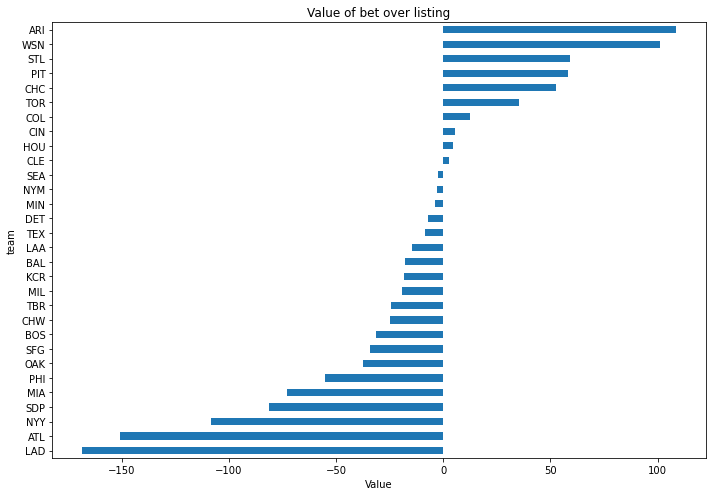

In [20]:
import matplotlib.pyplot as plt
compare_plot = pd.Series(compare['comparison'].values, index = compare['team']).sort_values()
fig, ax = plt.subplots(figsize = (10,7))
compare_plot.plot.barh(ax=ax)
ax.set_title("Value of bet over listing")
ax.set_xlabel("Value")
fig.tight_layout()
plt.savefig('../images/comparison_values_aug_20th.png');

In [21]:
compare['over_under'].sum()/2

130.01294517401044